# Lab 3. Graphics

## Table of Contents
 * [Anonymous functions](#anonymous_functions)
 * [Two-dimensional graphics](#two_dimensional_graphics)
     * [The `plot` function](#the_plot_function)
     * [Title and labels](#title_and_labels)
     * [Saving figures in different formats](#saving_figures_in_different_formats)
     * [Multiple plots](#multiple_plots)
     * [Polar graphs](#polar_graphs)
 * [Three-dimensional graphics](#three_dimensional_graphics)
     * [The `plot3` function and curves in 3-D](#the_plot3_function)
     * [The `surf` function and surfaces in 3-D](#the_surf_function)

In [1]:
clear, format short, format compact

<a id='anonymous_functions'></a>
## Anonymous functions

Before we plot functions using MATLAB, we need to be able to define functions in MATLAB. There are two ways to achieve this goal:

* using function m-file (discussed in Chapter 6)
* using anonymous function (today's goal)

The following three functions 

$$
\begin{align*}
y = f_1(x) & = \cos x \sin(\cos(\tan(x))), \\
r = f_2(\theta) & = \left( \cos 3\theta + 2 \cos 2\theta \right)^2, \\
z = f_3(x,y) & = \frac{\sin(x+y)}{1+x^2+y^2},
\end{align*}
$$

are defined as anonymous functions below:

In [2]:
f1 = @(x) cos(x) .* sin(cos(tan(x)));
f2 = @(theta) ( cos(3*theta) + 2*cos(2*theta) ).^2;
f3 = @(x, y) sin(x + y)./(1 + x.^2 + y.^2);

**Notes.**
* The function arguments can be an array. Note the use of elementwise operations.
* The function definition can get quite complicated involving vectors, matrices, and/or even other MATLAB functions.

Type in the following statments in MATLAB.

In [3]:
x1 = 5; y1 = f1(x1)
x2 = [5:-2:1]; y2 = f1(x2)
TH = diag(0:pi/2:2*pi); R = f2(TH)

y1 =
   -0.2342
y2 =
   -0.2342   -0.8276    0.0072
R =
    9.0000    9.0000    9.0000    9.0000    9.0000
    9.0000    4.0000    9.0000    9.0000    9.0000
    9.0000    9.0000    1.0000    9.0000    9.0000
    9.0000    9.0000    9.0000    4.0000    9.0000
    9.0000    9.0000    9.0000    9.0000    9.0000


**Question 1.** What are the types of the input and output variables?
* `x1` and `y1`
* `x2` and `y2`
* `TH` and `R`

**Question 2.** What would happen if we did not use elementwise operations in function definitions?

**Example 1.** Expressions in function definitions can get very complicated. For example,

In [4]:
h1 = @(x) [2*x, sin(x)];
h2 = @(x) [2*x, sin(x); 5*x, cos(x); 10*x, tan(x)];
r = @(a,b,m,n) a + (b-a)*rand(m,n);

**Example 2.** The function
$$
f_4(\theta; c_1, c_2, k_1, k_2) 
= (c_1 \cos k_1\theta +  c_2 \cos k_2 \theta)^2
$$
can be defined as

```
>> f4s = @(th,c1,c2,k1,k2) ( c1*cos(k1*th) + c2*cos(k2*th) ).^2;
>> f4v = @(th,c,k) ( c(1)*cos(k(1)*th) + c(2)*cos(k(2)*th) ).^2;
```

How are they different?

<a id='two_dimensional_graphics'></a>
## Two-dimensional graphics

<a id='the_plot_function'></a>
###  The ``plot`` function

To draw a curve in MATLAB:

1. Construct a pair of $n$-vectors `x` and `y` corresponding to the set of data points
$$
\{ (x_i, y_i)~|~i = 1, 2, \ldots, n \}
$$
which are in order on the curve.
2. Then type `plot(x, y)` in MATLAB.


**Example 1.** To draw the curve $y = \sin(x)$ on $[0, 2\pi]$:

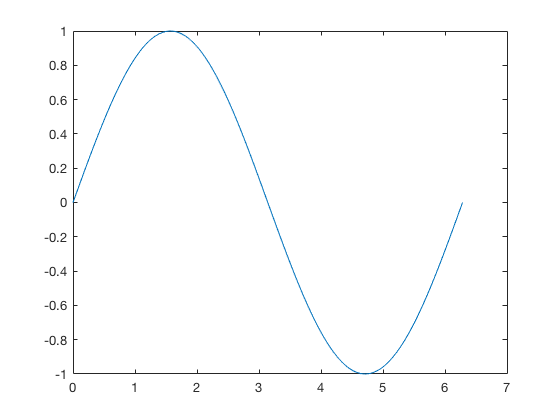

In [5]:
x = linspace(0, 2*pi, 101);
y = sin(x);
plot(x, y)

or, using anonymous function,

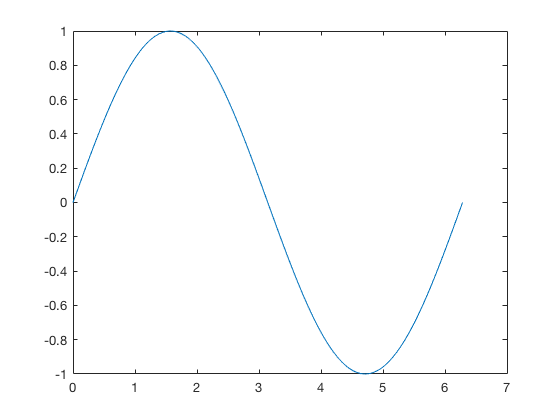

In [6]:
f = @(x) sin(x);
x = linspace(0, 2*pi, 101);
plot(x, f(x))

**More on `plot` function**
* To plot multiple curves:
```
>> plot(x1, y1, x2, y2, x3, y3, ...)
```
The legends are created by adding
```
>> legend('f1', 'f2', 'f3', ...)
``` 
after the `plot` statement.
* To specify line properties such as colors, styles, and markers:
```
>> plot(x, y, '--') % dashed line
>> plot(x, y, 'g:') % dotted line in green
```
For more customizing options, see Table 4.1 of the text. 

<a id='title_and_labels'></a>
### Title and labels

To label axes and the entire plot, add the following after `plot` statement:
```
>> xlabel('x axis')
>> ylabel('y axis')
>> title('my first graph')
```

To bring **Figure Window** to the front, add `shg` (**sh**ow **g**raph).

**Example 2.** (Wiggly curve) Create a script m-file with the following statements and run it.

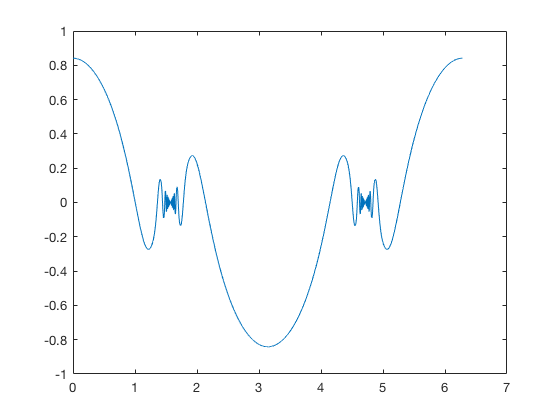

In [7]:
f1 = @(x) cos(x).*sin(cos(tan(x)));
x = 2*pi*[0:.0001:1];
% or x = linspace(0, 2*pi, 10001);
plot(x, f1(x))
shg

**Play around:**  See what happens after making following modifications one by one.

* change line 4: `plot(x, f1(x), 'r')`
* change line 4: `plot(x, f1(x), 'r--')`
* after line 4, add: `axis equal, axis tight`
* then add: `text(4.6, -0.3, 'very wiggly')`
* then add: `xlabel('x axis'), ylabel('y axis'), title('A wiggly curve')`

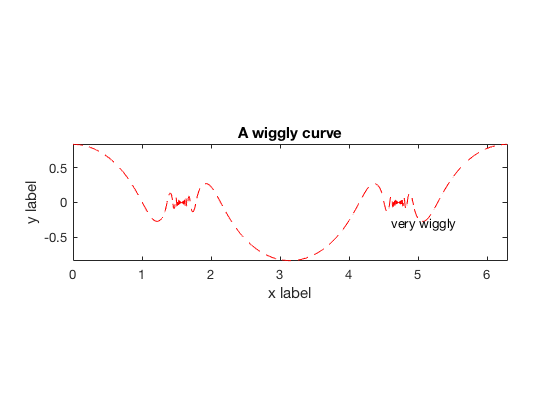

In [8]:
f1 = @(x) cos(x).*sin(cos(tan(x)));
x = 2*pi*[0:.0001:1];
% or x = linspace(0, 2*pi, 10001);
plot(x, f1(x), 'r--')
axis equal, axis tight
text(4.6, -0.3, 'very wiggly')
xlabel('x label')
ylabel('y label')
title('A wiggly curve')

<a id='saving_figures_in_different_formats'></a>
### Saving figures in different formats

We can save the figures in different formats. In each case, two equivalent methods are presented.

* as a pdf:
```
>> print -dpdf 'wiggly' 
>> print('-dpdf', 'wiggly')
```
* as a jpeg:
```
>> print -djpeg 'wiggly' 
>> print('-djpeg', 'wiggly')
```
* as an eps:
```
>> print -deps 'wiggly' 
>> print('-deps', 'wiggly')
```

**Exercise.** Do the following:
1. Define $f(x) = x^3 + x$ as an anonymous function.
2. Find $f'$ and $f''$ by hand and define them as anonymous functions.
3. Plot all three functions in one figure in the interval $[-1, 1]$.
4. Include labels and title in your plot.
5. Add legend to the graph using, e.g., `legend('f', 'fprime', 'f2prime')`.
6. Save the graph as a pdf file. 

<a id='multiple_plots'></a>
### Multiple plots

**Stacking.** To draw three curves using data `(x1, y1)`, `(x2, y2)`, and `(x3, y3)` in one plotting window:

* One-liner: `plot(x1, y1, x2, y2, x3, y3)`
* Using `hold` command:
```
hold off
plot(x1, y1)
hold on
plot(x2, y2)
plot(x3, y3)
```

**Subplots.** To draw the three curves separately side by side, use `subplot` function:
```
subplot(1, 3, 1)
plot(x1, y1)
subplot(1, 3, 2)
plot(x2, y2)
subplot(1, 3, 3)
plot(x3, y3)
```

In general, the statement `subplot(m, n, p)`
* divides the current figure window into an $m \times n$ grids of smaller plots and
* selects the $p$th grid.

**Example 3.** Type the following statements to generate figures with multiple plots.

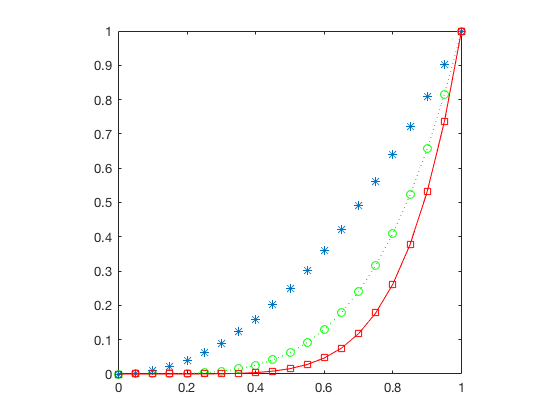

In [9]:
% sample points on the curve
x = linspace(0, 1, 21);
y1 = x.^2;
y2 = x.^4;
y3 = x.^6;

% stacking
hold off
plot(x, y1, '*')
hold on
plot(x, y2, 'g:o')
plot(x, y3, 'r-s')
axis image

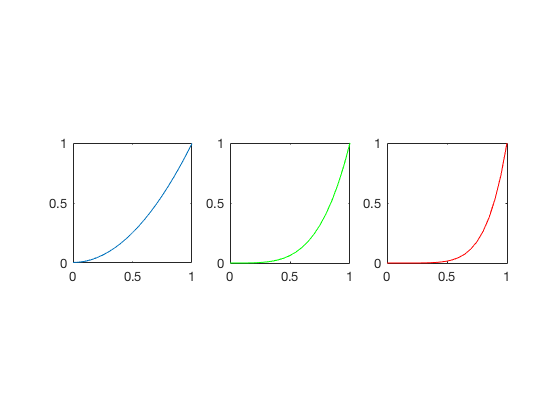

In [10]:
% subplots
subplot(1, 3, 1)
plot(x, y1)
axis image
subplot(1, 3, 2)
plot(x, y2, 'g')
axis image
subplot(1, 3, 3)
plot(x, y3, 'r')
axis image

**Note.** In case a figure window is already open, you might want to start each block of plotting codes with either `figure()`, `close`, or `clf`.

<a id='polar_graphs'></a>
### Polar graphs

To draw the polar curve
$$
r = f(\theta),
\quad \theta \in [a, b]
$$
we sample $n$ points $\{ (\theta_i, r_i)~|~r_i = f(\theta_i), 1\le i \le n \}$ on the curve and form vectors `th` and `r`. Then type `polar(th, r)`.

**Example 4.** Plot 
$$
r = f_2(\theta) = (\cos 3\theta + 2 \cos 2\theta)^2
$$
for $\theta \in [0, 2\pi]$. 

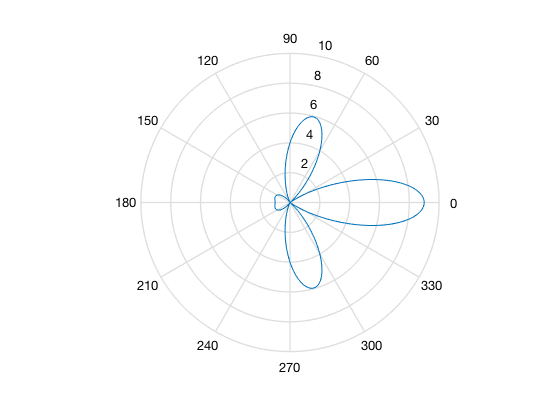

In [11]:
th = linspace(0, 2*pi, 361);
f2 = @(th) (cos(3*th) + 2*cos(2*th)).^2;
polar(th, f2(th))

**Exercise.**
1. Draw the graph of two-petal leaf given by
$$
r = f(\theta) = 1 + \sin(2\theta),
\quad \theta \in [0, 2\pi].
$$
2. Draw the graph of 
$$
r = f(\theta - \pi/4), \quad
r = f(\theta - \pi/2), \quad
r = f(\theta - 3\pi/4)
$$
on the same plotting window.
3. Does your figure make sense?

<a id='three_dimensional_graphics'></a>
## Three-dimensional graphics

For 3-D graphics, we proceed by way of examples.

<a id='the_plot3_function'></a>
### The ``plot3`` function and curves in 3-D

**Example 5.** Plot the helix given by the parametriztion
$$
\mathbf{r}(t) = \langle 10\cos t, 10 \sin t, t \rangle,
\quad t \in [0, 10\pi].
$$

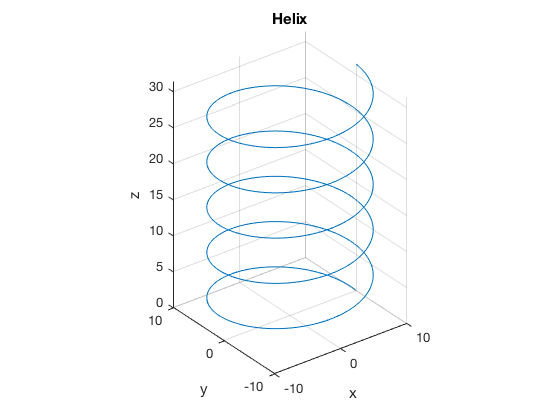

In [12]:
t = linspace(0, 10*pi, 1001);
plot3(10*cos(t), 10*sin(t), t)
xlabel('x')
ylabel('y')
zlabel('z')
title('Helix')
axis equal, grid on

**Exercise.** Modify the code to generate a corkscrew by putting the helix outside of an upside down cone. (*Hint*: use $\mathbf{r}(t) = \langle t \cos t, t \sin t, t \rangle$.)

<a id='the_surf_function'></a>
### The ``surf`` function and surfaces in 3-D

**Example 6.** Plot the saddle parametrized by
$$
\frac{z}{c} = \frac{x^2}{a^2} - \frac{y^2}{b^2}
$$
for your choice of $a, b,$ and $c$.

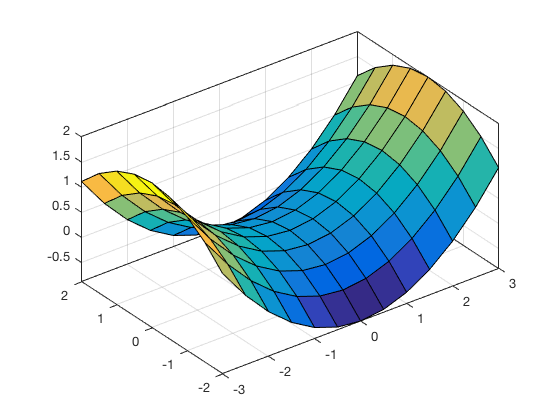

In [13]:
x = linspace(-3, 3, 13);
y = linspace(-2, 2, 9);
[X, Y] = meshgrid(x, y);

a = 1.5;
b = 1.5;
c = 0.5;
g2 = @(x,y) c*(x.^2/a^2 - y.^2/b^2);
surf(X, Y, g2(X,Y))
axis equal, box on